In [1]:
from pymongo import MongoClient
import numpy as np
import base64
from cpsdriver.codec import DocObjectCodec
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt

In [2]:
try:
    client = MongoClient('localhost:27017')
except pymongo.errors.ConnectionFailure as e:
    print(e)

In [3]:
client.database_names()

c:\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: database_names is deprecated. Use list_database_names instead.
  """Entry point for launching an IPython kernel.


['admin', 'config', 'cps-test-01', 'local']

In [4]:
db = client['cps-test-01']

In [5]:
# explore plate_data           

plate_data = db['plate_data']
print (plate_data.count())
item = plate_data.find_one()
# print(item)

sample = [None,None,None,None,None,None]

for item in plate_data.find():
    gondola_id = item['gondola_id']
    
    plate_data_item = DocObjectCodec.decode(doc=item, collection='plate_data')
    date_time = item['date_time']
    timestamp = plate_data_item.timestamp # seconds since epoch
    np_data = plate_data_item.data
    sample[gondola_id] = np_data
    print('gondola', gondola_id, 'plate_data shape', np_data.shape, 'date_time',date_time,'ts', timestamp)

# time x shelf x plate

c:\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  after removing the cwd from sys.path.


842
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:05.106000 ts 1580250245.089647
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:05.106000 ts 1580250245.092723
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:05.107000 ts 1580250245.103084
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:05.158000 ts 1580250245.15582
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:05.200000 ts 1580250245.19951
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:05.293000 ts 1580250245.291311
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:05.296000 ts 1580250245.294285
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:05.302000 ts 1580250245.301375
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:05.359000 ts 1580250245.357504
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:05.397000 ts 1580250245.395687
gondola 5 plate_data shape (

gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:09.136000 ts 1580250249.091688
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:09.136000 ts 1580250249.099569
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:09.173000 ts 1580250249.149272
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:09.216000 ts 1580250249.195236
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:09.300000 ts 1580250249.29071
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:09.302000 ts 1580250249.292842
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:09.304000 ts 1580250249.300826
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:09.348000 ts 1580250249.347511
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:09.397000 ts 1580250249.394306
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:09.492000 ts 1580250249.489424
gondola 5 plate_data shape (12,

gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:13.550000 ts 1580250253.549851
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:13.603000 ts 1580250253.595843
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:13.690000 ts 1580250253.689693
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:13.699000 ts 1580250253.691912
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:13.704000 ts 1580250253.703433
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:13.750000 ts 1580250253.749182
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:13.801000 ts 1580250253.795833
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:13.892000 ts 1580250253.890836
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:13.895000 ts 1580250253.894355
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:13.899000 ts 1580250253.89816
gondola 2 plate_data shape (12,

gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:22.527000 ts 1580250262.500993
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:22.551000 ts 1580250262.549554
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:22.605000 ts 1580250262.592428
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:22.695000 ts 1580250262.692649
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:22.695000 ts 1580250262.694282
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:22.704000 ts 1580250262.703013
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:22.749000 ts 1580250262.748201
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:22.806000 ts 1580250262.805451
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:22.893000 ts 1580250262.891966
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:22.894000 ts 1580250262.893595
gondola 4 plate_data shape (12

gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:26.098000 ts 1580250266.090242
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:26.100000 ts 1580250266.09213
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:26.114000 ts 1580250266.112698
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:26.151000 ts 1580250266.146169
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:26.194000 ts 1580250266.193089
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:26.289000 ts 1580250266.28825
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:26.295000 ts 1580250266.294229
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:26.304000 ts 1580250266.302807
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:26.351000 ts 1580250266.345956
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:26.394000 ts 1580250266.393249
gondola 3 plate_data shape (12, 

gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:34.490000 ts 1580250274.489449
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:34.492000 ts 1580250274.491236
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:34.500000 ts 1580250274.498937
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:34.552000 ts 1580250274.54969
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:34.602000 ts 1580250274.592915
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:34.691000 ts 1580250274.690487
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:34.694000 ts 1580250274.693583
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:34.700000 ts 1580250274.699328
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:34.750000 ts 1580250274.748416
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:34.802000 ts 1580250274.797513
gondola 3 plate_data shape (12,

In [6]:
# aggregate weight per shelf
# compute moving mean and variance

def init_2D_array(dim1, dim2):
    array = np.array( [ [None for i in range(dim2)] for j in range(dim1) ],
                    dtype=object)
    for i in range(dim1):
        for j in range(dim2):
            array[i][j] = []
    return array

def init_1D_array(dim):
    array = np.array( [None for i in range(dim) ],
                    dtype=object)
    for i in range(dim):
        array[i] = []
    return array

def get_weights_per_shelf(number_gondolas=5, number_shelves=6):
    weight_mean = init_2D_array(number_gondolas, number_shelves)
    weight_std = init_2D_array(number_gondolas, number_shelves)
    timestamps = init_1D_array(number_gondolas)
    date_times = init_1D_array(number_gondolas)
    
    for item in plate_data.find():
        gondola_id = item['gondola_id']
        plate_data_item = DocObjectCodec.decode(doc=item, collection='plate_data')
        date_time = item['date_time']
        timestamp = plate_data_item.timestamp # seconds since epoch
        np_data = plate_data_item.data # [time,shelf,plate]
        np_data = np_data[:,1:13,1:13] # remove NaN elements
        
        # sum plates per shelf
        np_shelf = np_data.sum(axis=2) # [time,shelf]
        np_shelf = np_shelf.transpose() # [shelf, time]
        
        # get mean/std for weights per 12 data points (0.2 seconds)
        mean = np.mean(np_shelf, axis=1)
        std = np.std(np_shelf, axis=1)
        
        timestamps[gondola_id - 1].append(timestamp)
        date_times[gondola_id - 1].append(date_time)
        number_shelves= len(mean)
        for i in range(number_shelves):
            weight_mean[gondola_id - 1][i].append(mean[i])
            weight_std[gondola_id - 1][i].append(std[i])
    return weight_mean,weight_std,timestamps,date_times

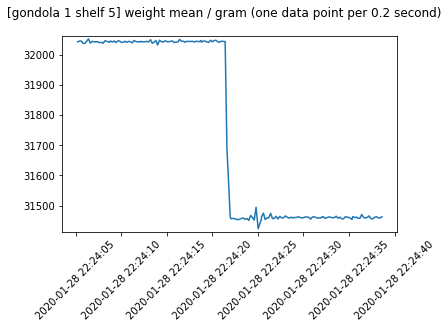

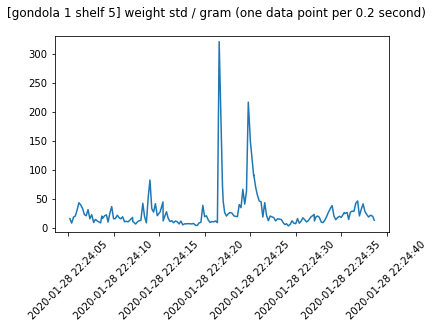

In [7]:
# plot moving mean and var

def plot_data(data, date_time, title=None):
    assert len(data) == len(date_time)
#     print (data)
    fig = plt.figure()
    plt.subplots_adjust(bottom=0.2)
    plt.xticks( rotation=45 )
    ax=plt.gca()
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    ax.get_yaxis().get_major_formatter().set_useOffset(False)
#     print (min(data))
    ax.set_ylim([min(data)-10, max(data)+10])
    plt.plot(date_time,data)
    fig.suptitle(title)
    plt.show()
weight_mean,weight_std,timestamps,date_times = get_weights_per_shelf()
# print (weight_mean.shape)
# print (weight_std.shape)
# print (timestamps.shape)
# print (date_times.shape)

plot_gondola_id = 1
plot_shelf_id = 5
title = '[gondola %d shelf %d] weight mean / gram (one data point per 0.2 second)' % (plot_gondola_id, plot_shelf_id)
plot_data(weight_mean[plot_gondola_id-1][plot_shelf_id-1], date_times[plot_gondola_id-1], title)
title = '[gondola %d shelf %d] weight std / gram (one data point per 0.2 second)' % (plot_gondola_id, plot_shelf_id)
plot_data(weight_std[plot_gondola_id-1][plot_shelf_id-1], date_times[plot_gondola_id-1], title)

In [8]:
# detect weights events

def detect_weight_events(weight_mean, weight_std, date_times, thresholds={'std': 40, 'mean': 10}):
    events = []
    num_gondola, num_shelf = weight_mean.shape
    num_times = len(date_times[0])
    for gondola_id in range(num_gondola):
        for shelf_id in range(num_shelf):
            var_is_active = np.array(weight_std[gondola_id][shelf_id]) > thresholds.get('std', 40)
            state_changes = np.diff(var_is_active)
            state_change_inds = [i for i, v in enumerate(state_changes) if v > 0]
            state_lengths = np.diff([0] + state_change_inds + [len(var_is_active) - 1])
            active_inds = [i for i in range(1, len(state_lengths), 2)]
            stable_inds = [i for i in range(2, len(state_lengths), 2)]
            valid_active_intervals = [i for i, ind in enumerate(active_inds) if state_lengths[ind] > thresholds.get('N_high', 1)]
            valid_stable_intervals = [i for i, ind in enumerate(stable_inds) if state_lengths[ind] > thresholds.get('N_low', 5)]
            min_next_active_interval = 0
            for active_idx in valid_active_intervals:
                if active_idx <= min_next_active_interval:
                    continue
                    
                stable_idx = -1
                for i in valid_stable_intervals:
                    if i >= active_idx:
                        stable_idx = i
                        break
                if stable_idx == -1:
                    break
                
                n_begin = state_change_inds[active_inds[active_idx] - 1] - thresholds.get('N_low', 5)
                n_end = state_change_inds[stable_inds[stable_idx] - 1] + 1 + thresholds.get('N_low', 5)
                w_begin = weight_mean[gondola_id][shelf_id][n_begin]
                w_end = weight_mean[gondola_id][shelf_id][n_end]
                delta_w = w_end - w_begin
                
                if abs(delta_w) > thresholds.get('mean', 10):
                    trigger_begin = date_times[gondola_id][n_begin]
                    trigger_end = date_times[gondola_id][n_end]
                    event = {'trigger_begin': trigger_begin,
                             'trigger_end': trigger_end,
                             'n_begin': n_begin,
                             'n_end': n_end,
                             'delta_weight': delta_w,
                             'gondola': gondola_id + 1,
                             'shelf': shelf_id + 1,
                            #'plate': 
                            }
                    events.append(event)
                min_next_active_interval = stable_idx
    return events 

In [9]:
detect_weight_events(weight_mean, weight_std, date_times)

c:\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


[{'trigger_begin': datetime.datetime(2020, 1, 28, 22, 24, 20, 397000),
  'trigger_end': datetime.datetime(2020, 1, 28, 22, 24, 23, 208000),
  'n_begin': 76,
  'n_end': 90,
  'delta_weight': -592.1953,
  'gondola': 1,
  'shelf': 5},
 {'trigger_begin': datetime.datetime(2020, 1, 28, 22, 24, 9, 397000),
  'trigger_end': datetime.datetime(2020, 1, 28, 22, 24, 12, 613000),
  'n_begin': 21,
  'n_end': 37,
  'delta_weight': -10.1796875,
  'gondola': 1,
  'shelf': 6},
 {'trigger_begin': datetime.datetime(2020, 1, 28, 22, 24, 12, 107000),
  'trigger_end': datetime.datetime(2020, 1, 28, 22, 24, 16, 794000),
  'n_begin': 34,
  'n_end': 58,
  'delta_weight': 13.074219,
  'gondola': 1,
  'shelf': 6}]

In [10]:
def init_1D_array(dim):
    array = np.array( [None for i in range(dim) ],
                    dtype=object)
    for i in range(dim):
        array[i] = []
    return array

# [gondola, shelf, ts]
def init_2D_array(dim1, dim2):
    array = np.array( [ [None for j in range(dim2)] for i in range(dim1) ],
                    dtype=object)
    for i in range(dim1):
        for j in range(dim2):
            array[i][j] = []
    return array

# [gondola, shelf, plate_id, ts]
def init_3D_array(dim1, dim2, dim3):
    array = np.array( [ [ [None for k in range(dim3)] for j in range(dim2)] for i in range(dim1) ],
                    dtype=object)
    for i in range(dim1):
        for j in range(dim2):
            for k in range(dim3):
                array[i][j][k] = []
    return array


In [11]:
def get_weights(number_gondolas=5, number_shelves=6, number_plates=12,window_moving_avg=1):
    weight_plate_mean = init_3D_array(number_gondolas, number_shelves, number_plates)
    weight_plate_std = init_3D_array(number_gondolas, number_shelves, number_plates)
    weight_shelf_mean = init_2D_array(number_gondolas, number_shelves)
    weight_shelf_std = init_2D_array(number_gondolas, number_shelves)
    timestamps = init_1D_array(number_gondolas)
    date_times = init_1D_array(number_gondolas)
    plate_data = db['plate_data']
    
    for item in plate_data.find():
        gondola_id = item['gondola_id']
        plate_data_item = DocObjectCodec.decode(doc=item, collection='plate_data')
        date_time = item['date_time']
        timestamp = plate_data_item.timestamp # seconds since epoch
        np_plate = plate_data_item.data # [time,shelf,plate]
        np_plate = np_plate[:,1:13,1:13] # remove NaN elements
        
        # sum plates per shelf
        np_shelf = np_plate.sum(axis=2)      # [time,shelf]
        np_shelf = np_shelf.transpose()      # [shelf, time]
        np_plate = np_plate.transpose(1,2,0) # [shelf,plate,time]
        
        # get mean/std for weights per 12 data points (0.2 seconds)
        mean_plate = np.mean(np_plate, axis=2) # [shelf, plate]
        std_plate = np.std(np_plate, axis=2)   # [shelf, plate]
        mean_shelf = np.mean(np_shelf, axis=1) # [shelf]
        std_shelf = np.std(np_shelf, axis=1)   # [shelf]
        
        timestamps[gondola_id - 1].append(timestamp)
        date_times[gondola_id - 1].append(date_time)
        number_shelves = len(mean_shelf)
        for shelf_index in range(number_shelves):
            weight_shelf_mean[gondola_id - 1][shelf_index].append(mean_shelf[shelf_index])
            weight_shelf_std[gondola_id - 1][shelf_index].append(std_shelf[shelf_index])
            for plate_index in range(number_plates):
                weight_plate_mean[gondola_id - 1][shelf_index][plate_index].append(mean_plate[shelf_index][plate_index])
                weight_plate_std[gondola_id - 1][shelf_index][plate_index].append(std_plate[shelf_index][plate_index])
                
    return weight_plate_mean,weight_plate_std,weight_shelf_mean,weight_shelf_std,timestamps,date_times


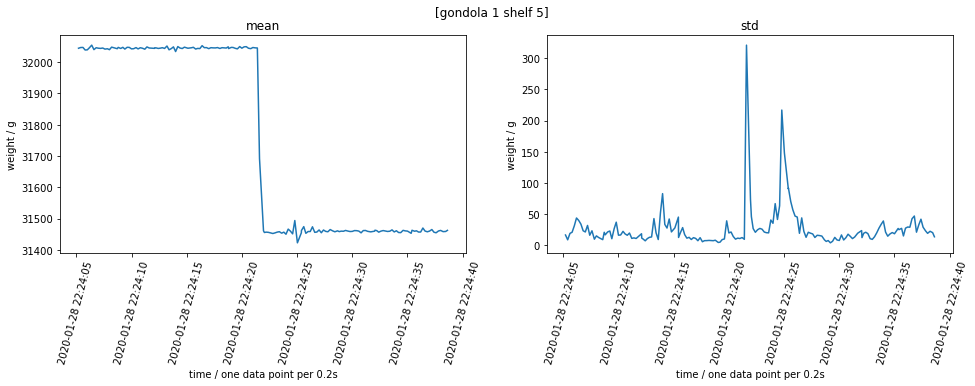

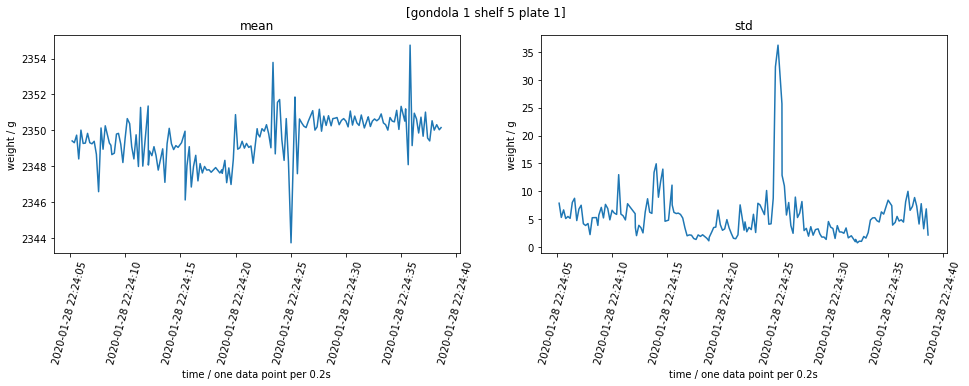

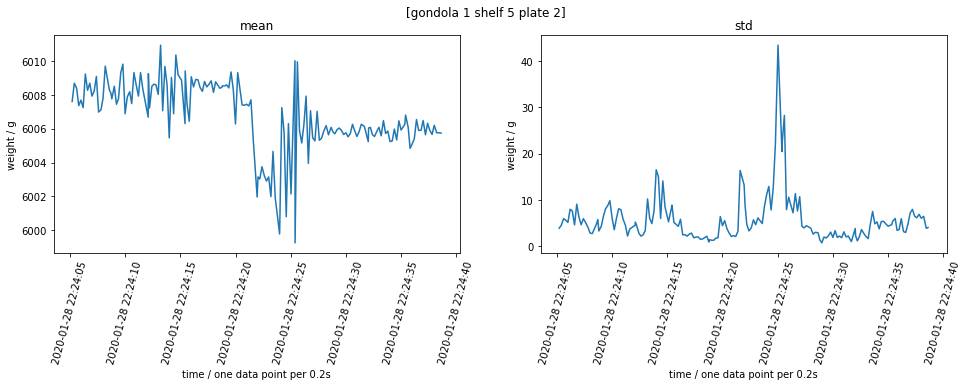

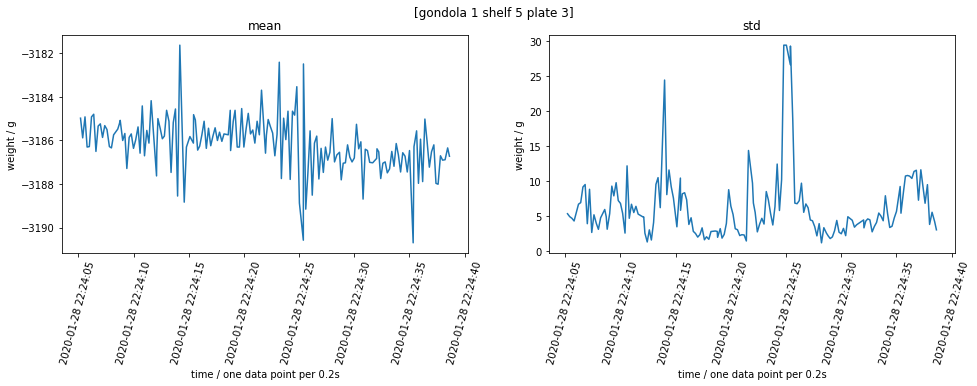

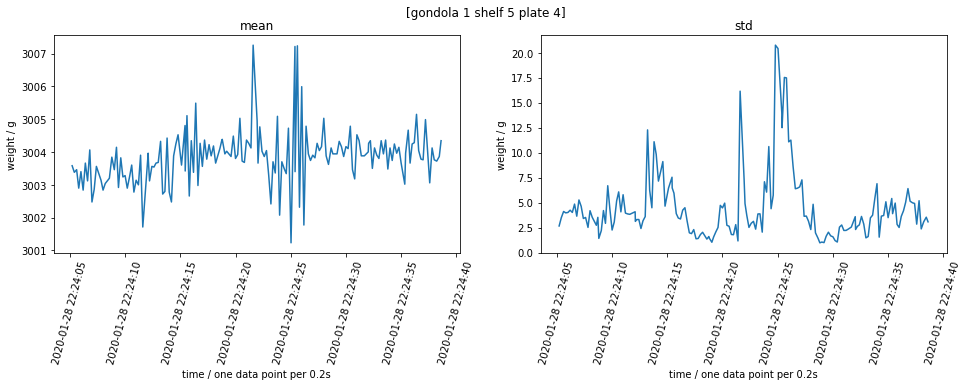

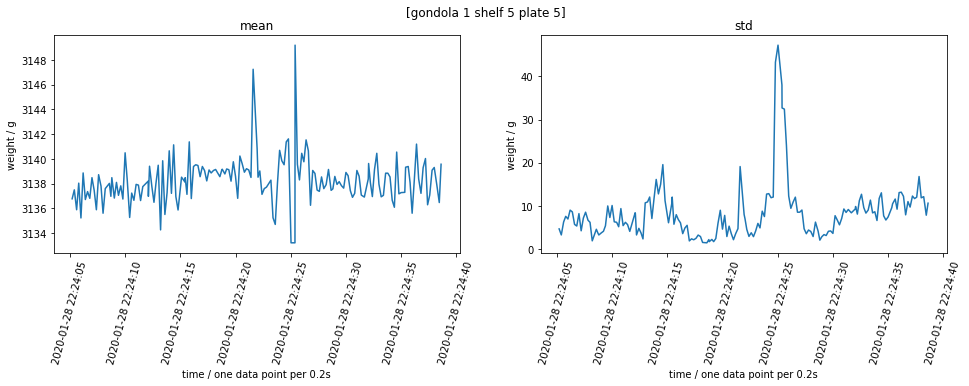

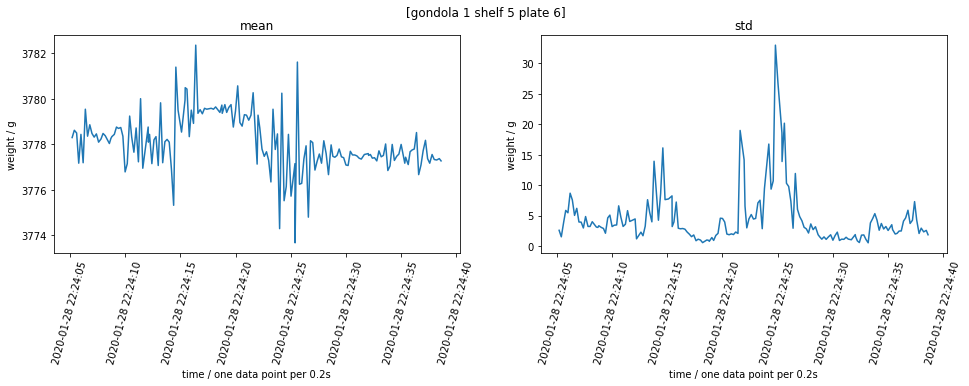

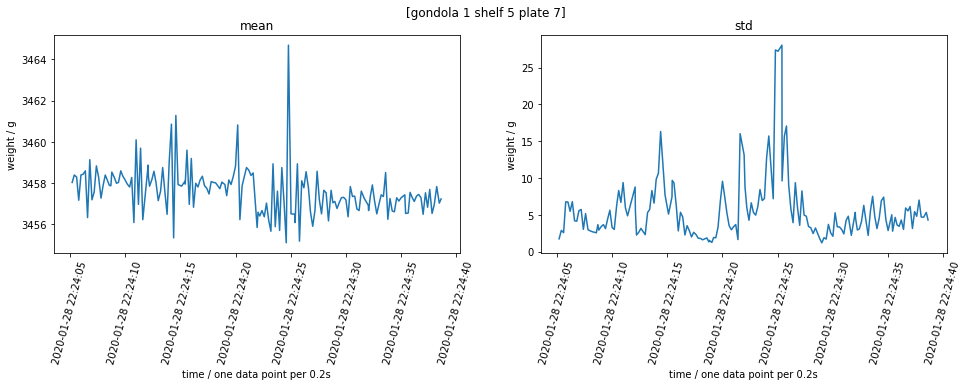

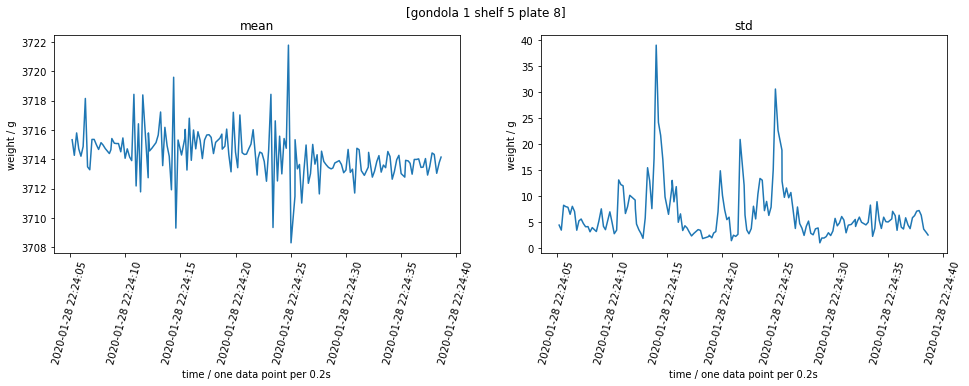

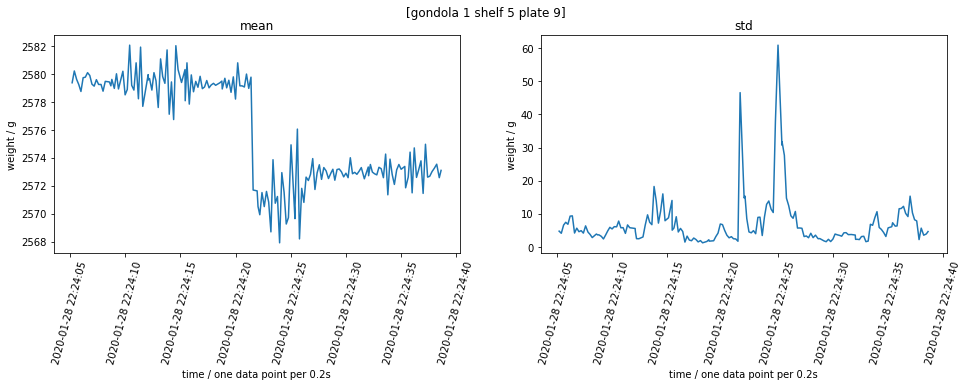

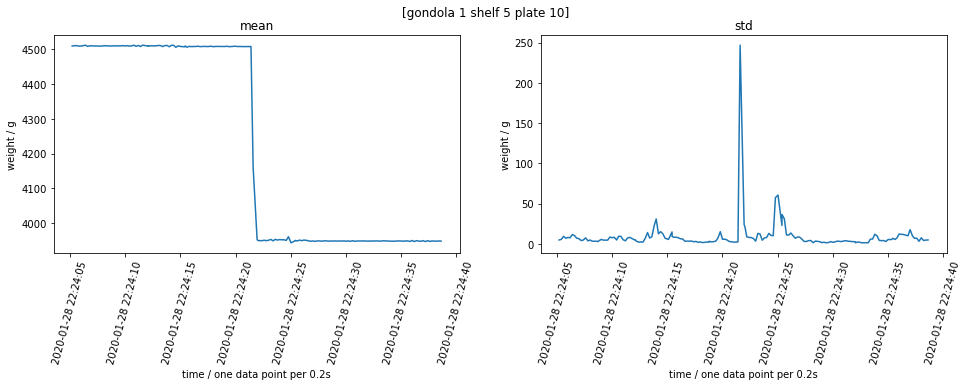

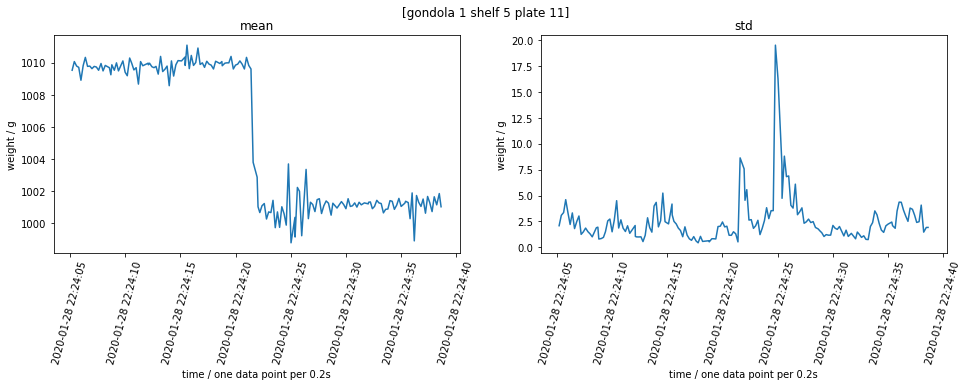

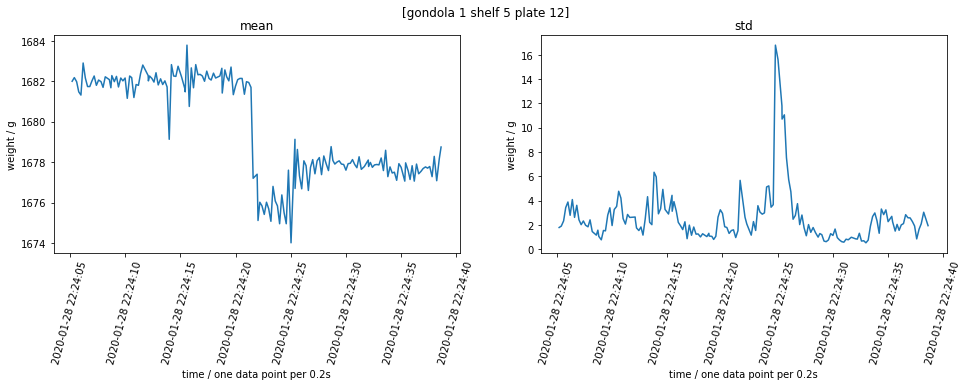

In [12]:
def plot_data2(mean, std, date_time, title=None):
    assert len(mean) == len(date_time)
    assert len(std) == len(date_time)

    
    fig = plt.figure(figsize=(16,4))
    fig.suptitle(title)
    
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.title.set_text('mean')
    ax2.title.set_text('std')
    
    ax1.plot(date_time, mean)
    ax2.plot(date_time, std)
    
    for tick in ax1.get_xticklabels():
        tick.set_rotation(75)
    for tick in ax2.get_xticklabels():
        tick.set_rotation(75)
        
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
    ax1.xaxis.set_major_formatter(xfmt)
    ax1.get_yaxis().get_major_formatter().set_useOffset(False)
    ax2.xaxis.set_major_formatter(xfmt)
    ax2.get_yaxis().get_major_formatter().set_useOffset(False)
    
    ax1.set_ylabel('weight / g')
    ax1.set_xlabel('time / one data point per 0.2s')
    ax2.set_ylabel('weight / g')
    ax2.set_xlabel('time / one data point per 0.2s')
    
    plt.show()
    
weight_plate_mean,weight_plate_std,weight_shelf_mean,weight_shelf_std,timestamps,date_times = get_weights()
# print (weight_plate_mean.shape)
# print (weight_plate_std.shape)
# print (weight_shelf_mean.shape)
# print (weight_shelf_std.shape)
# print (timestamps.shape)
# print (date_times.shape)

# take water
plot_gondola_id = 1
plot_shelf_id = 5
plot_plate_ids = [1,2,3,4,5,6,7,8,9,10,11,12]

# take chip
# plot_gondola_id = 2
# plot_shelf_id = 5
# plot_plate_ids = [1,2,3,4,5,6,7,8,9,10,11,12]

title = '[gondola %d shelf %d]' % (plot_gondola_id, plot_shelf_id)
plot_data2(weight_shelf_mean[plot_gondola_id-1][plot_shelf_id-1],
          weight_shelf_std[plot_gondola_id-1][plot_shelf_id-1], 
          date_times[plot_gondola_id-1], 
          title)


for plot_plate_id in plot_plate_ids:
    title = '[gondola %d shelf %d plate %d]' % (plot_gondola_id, plot_shelf_id, plot_plate_id)
    plot_data2(weight_plate_mean[plot_gondola_id-1][plot_shelf_id-1][plot_plate_id-1],
              weight_plate_std[plot_gondola_id-1][plot_shelf_id-1][plot_plate_id-1], 
              date_times[plot_gondola_id-1], 
              title)


In [13]:
# detect weights events

def detect_weight_events(weight_shelf_mean, 
                         weight_shelf_std, 
                         weight_plate_mean, 
                         weight_plate_std, 
                         date_times, 
                         number_plates=12, 
                         thresholds={'std_shelf': 40, 'mean_shelf': 10}):
    events = []
    num_gondola, num_shelf = weight_shelf_mean.shape
    num_times = len(date_times[0])
    for gondola_id in range(num_gondola):
        for shelf_id in range(num_shelf):
            var_is_active = np.array(weight_shelf_std[gondola_id][shelf_id]) > thresholds.get('std_shelf', 40)
            state_changes = np.diff(var_is_active)
            state_change_inds = [i for i, v in enumerate(state_changes) if v > 0]
            state_lengths = np.diff([0] + state_change_inds + [len(var_is_active) - 1])
            active_inds = [i for i in range(1, len(state_lengths), 2)]
            stable_inds = [i for i in range(2, len(state_lengths), 2)]
            valid_active_intervals = [i for i, ind in enumerate(active_inds) if state_lengths[ind] > thresholds.get('N_high', 1)]
            valid_stable_intervals = [i for i, ind in enumerate(stable_inds) if state_lengths[ind] > thresholds.get('N_low', 5)]
            min_next_active_interval = 0
            for active_idx in valid_active_intervals:
                if active_idx <= min_next_active_interval:
                    continue
                    
                stable_idx = -1
                for i in valid_stable_intervals:
                    if i >= active_idx:
                        stable_idx = i
                        break
                if stable_idx == -1:
                    break
                
                n_begin = state_change_inds[active_inds[active_idx] - 1] - thresholds.get('N_low', 5)
                n_end = state_change_inds[stable_inds[stable_idx] - 1] + 1 + thresholds.get('N_low', 5)
                w_begin = weight_shelf_mean[gondola_id][shelf_id][n_begin]
                w_end = weight_shelf_mean[gondola_id][shelf_id][n_end]
                delta_w = w_end - w_begin
                
                if abs(delta_w) > thresholds.get('mean_shelf', 10):
                    trigger_begin = date_times[gondola_id][n_begin]
                    trigger_end = date_times[gondola_id][n_end]
                    
                    plates = [0] * number_plates
                    for plate_id in range(number_plates):
                        
                        plates[plate_id] = int(abs(weight_plate_mean[gondola_id][shelf_id][plate_id][n_end] 
                                                   - weight_plate_mean[gondola_id][shelf_id][plate_id][n_begin]) 
                                               > thresholds.get('mean_plate', 5))
                    
                    
                    event = {'trigger_begin': trigger_begin,
                             'trigger_end': trigger_end,
                             'n_begin': n_begin,
                             'n_end': n_end,
                             'delta_weight': delta_w,
                             'gondola': gondola_id + 1,
                             'shelf': shelf_id + 1,
                             'plates': plates, 
                            }
                    events.append(event)
                min_next_active_interval = stable_idx
    return events 


In [14]:
 detect_weight_events(weight_shelf_mean, weight_shelf_std, weight_plate_mean, weight_plate_std, date_times)

c:\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


[{'trigger_begin': datetime.datetime(2020, 1, 28, 22, 24, 20, 397000),
  'trigger_end': datetime.datetime(2020, 1, 28, 22, 24, 23, 208000),
  'n_begin': 76,
  'n_end': 90,
  'delta_weight': -592.1953,
  'gondola': 1,
  'shelf': 5,
  'plates': [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]},
 {'trigger_begin': datetime.datetime(2020, 1, 28, 22, 24, 9, 397000),
  'trigger_end': datetime.datetime(2020, 1, 28, 22, 24, 12, 613000),
  'n_begin': 21,
  'n_end': 37,
  'delta_weight': -10.1796875,
  'gondola': 1,
  'shelf': 6,
  'plates': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
 {'trigger_begin': datetime.datetime(2020, 1, 28, 22, 24, 12, 107000),
  'trigger_end': datetime.datetime(2020, 1, 28, 22, 24, 16, 794000),
  'n_begin': 34,
  'n_end': 58,
  'delta_weight': 13.074219,
  'gondola': 1,
  'shelf': 6,
  'plates': [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]}]